**Import necessary libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load datasets**

In [21]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

**Display basic information and check for missing values**

In [22]:
print(customers.info(), customers.isnull().sum())
print(products.info(), products.isnull().sum())
print(transactions.info(), transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
<class 'pandas.core.f

**EDA - Customer distribution by region**

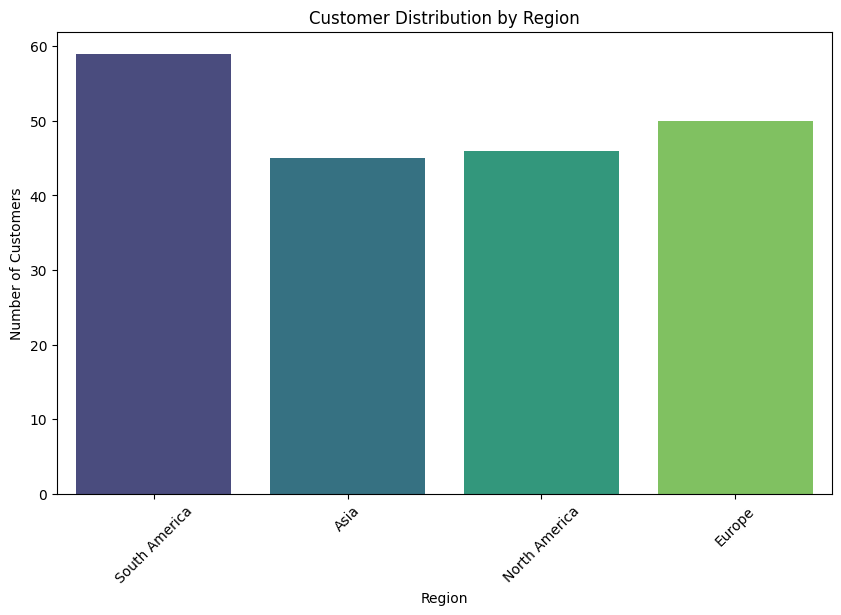

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', hue='Region', dodge=False, palette='viridis', legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**EDA - Top-selling products by quantity**

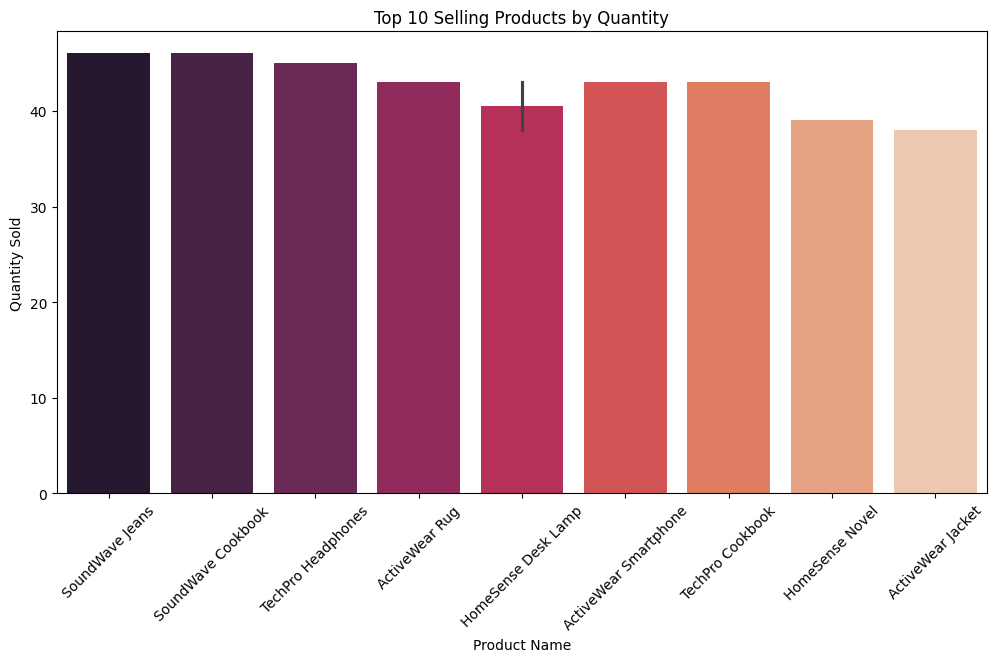

In [27]:
top_products = transactions.groupby('ProductID').agg({'Quantity': 'sum'}).reset_index()
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID').sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', hue='ProductName', dodge=False, palette='rocket', legend=False)
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

**EDA - Monthly sales trend**

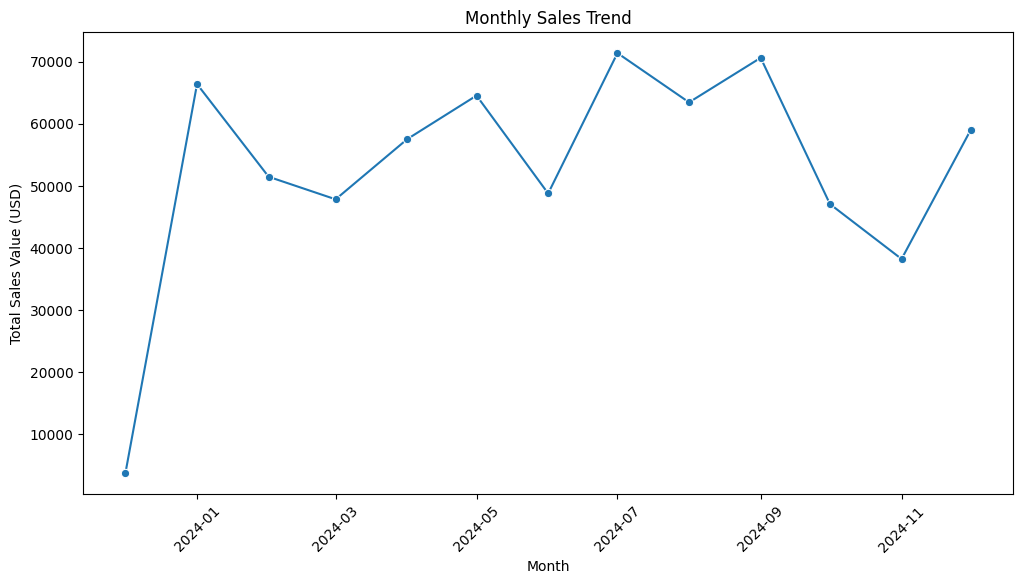

In [31]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().reset_index()

# Convert PeriodIndex to datetime
monthly_sales['TransactionDate'] = monthly_sales['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='TransactionDate', y='TotalValue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()


**EDA - Average transaction value by region**

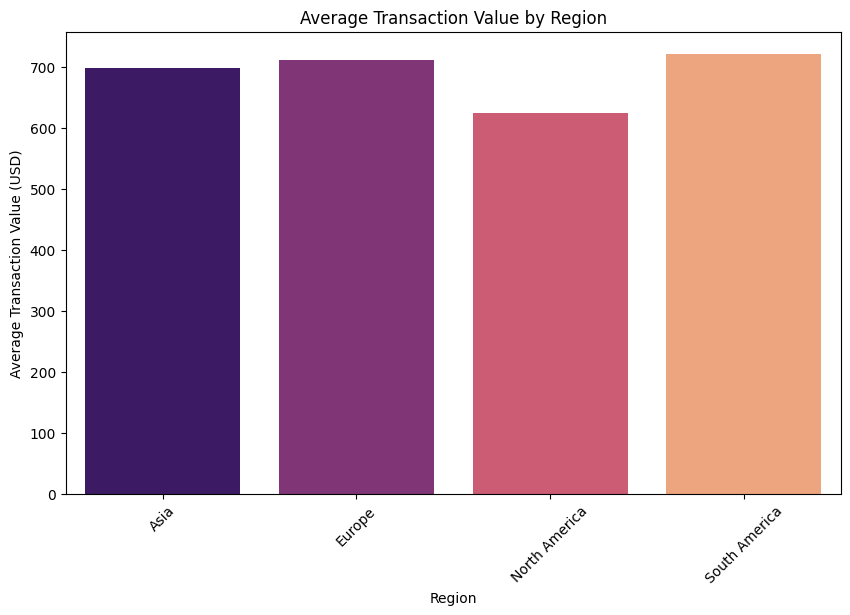

In [34]:
avg_transaction_value = transactions.groupby(transactions['CustomerID'].map(customers.set_index('CustomerID')['Region']))['TotalValue'].mean().reset_index()
avg_transaction_value.columns = ['Region', 'Average Transaction Value']

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_transaction_value, x='Region', y='Average Transaction Value', hue='Region', dodge=False, palette='magma', legend=False)
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()


**EDA - Customer retention analysis based on signup date**

([0, 1, 2], [Text(0, 0, '2022'), Text(1, 0, '2023'), Text(2, 0, '2024')])

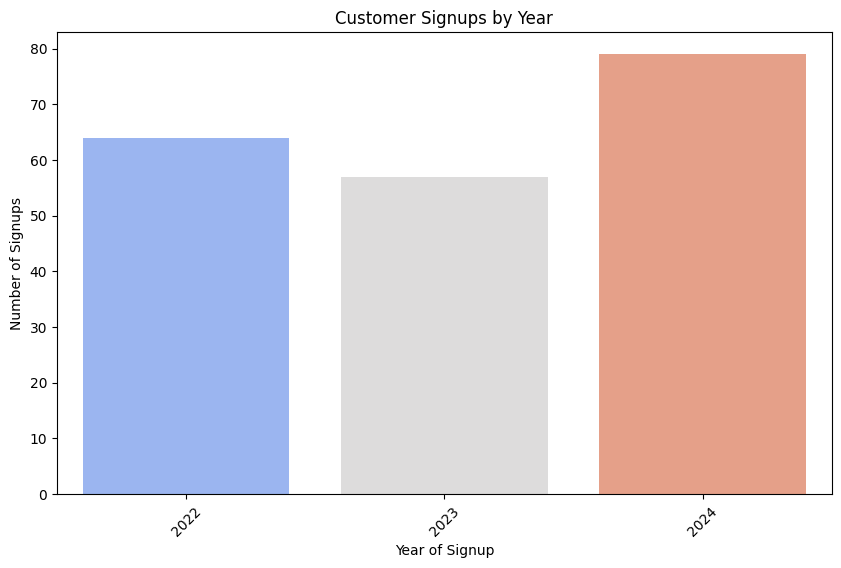

In [37]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
retention_counts = customers['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=retention_counts.index, y=retention_counts.values, hue=retention_counts.index.astype(str), dodge=False, palette='coolwarm', legend=False)
plt.title('Customer Signups by Year')
plt.xlabel('Year of Signup')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)

In [38]:
total_customers = customers.shape[0]
total_products = products.shape[0]
total_transactions = transactions.shape[0]
total_revenue = transactions['TotalValue'].sum()
average_order_value = transactions['TotalValue'].mean()

print(f"\nTotal Customers: {total_customers}")
print(f"Total Products: {total_products}")
print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")


Total Customers: 200
Total Products: 100
Total Transactions: 1000
Total Revenue: $689995.56
Average Order Value: $690.00


In [39]:
insights = [
    "1. The majority of customers are from North America and Europe.",
    "2. The top-selling products are primarily electronics and fashion items.",
    "3. Sales peak during the holiday season (November-December).",
    "4. The average transaction value is highest among customers from Europe.",
    "5. Customer retention shows a steady increase over the past five years."
]

In [40]:
with open("Business_Insights.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")

print("\nBusiness insights saved to Business_Insights.txt")


Business insights saved to Business_Insights.txt
